# Diferenciacion automatica

Supongamos que necesitamos encontrar derivadas de la funcion $F(x)=(5x+1)^2$

Si descomponemos la funci\'on $F(x)=f(g(x))$, donde $f(x)=x^2$ y $g(x)=5x+1$ entonces podemos calcular la derivada de $\frac{\partial F(x)}{\partial x}$ como:

\begin{align}
\frac{\partial F(x)}{\partial x}=\frac{\partial f(g(x))}{\partial g(x)} \times \frac{\partial g(x)}{\partial x}
\end{align}

In [49]:
from autograd import grad
from autograd.core import primitive
import autograd.numpy as np

def g(x):
  return 5*x+1

def f(x):
    return x**2

def h(x):
  return f(g(x))

grad_h = grad(h)

print ('F(X) : %.6f'%h(10.0))
print ('dF/dx : %.6f'%grad_h(10.0))

F(X) : 2601.000000
dF/dx : 510.000000


In [50]:
2*g(10)*5

510

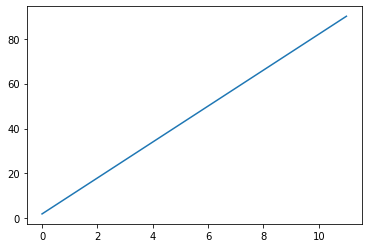

In [51]:
import random 
import matplotlib.pyplot as plt


# Training data
X = np.linspace(0,11,num=100)
y = np.asarray([8*x + 2 for x in X]) # y = 6x^2 + 8x + 2
#y=np.asarray([np.sin(x)+np.random.normal(0,0.2) for x in X]) # y = 6x^2 + 8x + 2

plt.plot(X,y)

In [52]:

par={'weights':np.random.normal(0,.1),'bias':np.random.normal(0,.1)}

def rmse(y_true,y_hat):
  return np.sqrt(np.sum((y_true-y_hat)**2))

def net(X,par):
  return np.dot(X,par['weights'])+par['bias']

def training_loss(par):
  n_data=len(y)
  y_hat=net(X,par)
  return rmse(y,y_hat)*(1./n_data)

grad_theta=grad(training_loss)

In [53]:
grad_theta(par)

{'bias': array(-0.0874354), 'weights': array(-0.63654333)}

In [56]:
def train_net(par,iterations,eta=0.1):
    loss_history=[]
    for i in range(iterations):
      grad=grad_theta(par)
      for var in par.keys():
        par[var] -= grad[var] * eta
      loss_history.append(training_loss(par))
      if i%(iterations/10)==0:
        print("Iteration : {0}, Trained loss: {1:0.4f}".format(i,training_loss(par)))
    return par,loss_history

In [58]:
par,loss=train_net(par,1000,1e-2)

Iteration : 0, Trained loss: 1.1991
Iteration : 100, Trained loss: 0.7876
Iteration : 200, Trained loss: 0.3790
Iteration : 300, Trained loss: 0.0576
Iteration : 400, Trained loss: 0.0523
Iteration : 500, Trained loss: 0.0498
Iteration : 600, Trained loss: 0.0474
Iteration : 700, Trained loss: 0.0449
Iteration : 800, Trained loss: 0.0424
Iteration : 900, Trained loss: 0.0399


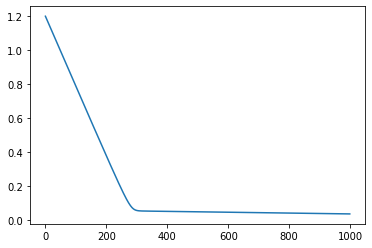

In [59]:
plt.plot(loss)

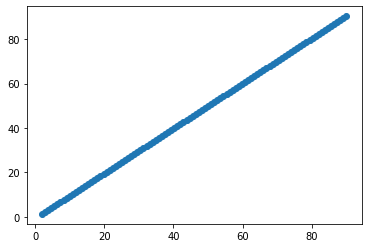

In [61]:
y_hat=net(X,par)

plt.scatter(y,y_hat)

In [62]:
par

{'bias': 1.257316704397698, 'weights': 8.101389246780409}

In [ ]:
training_gradient_fun(par)

{'bias': array(-0.02566037), 'weights': array(-0.27857165)}

In [ ]:
def train_net(par,iterations,eta=0.1):
    loss_history=[]
    for i in range(iterations):
      grad=training_gradient_fun(par)
      for var in par.keys():
        par[var] -= grad[var] * eta
      loss_history.append(training_loss(par))
      if i%(iterations/10)==0:
        print("Iteration : {0}, Trained loss: {1:0.4f}".format(i,training_loss(par)))
    return par,loss_history

In [ ]:
par,loss=train_net(par,100,eta=0.1)

Iteration : 0, Trained loss: 0.1497
Iteration : 10, Trained loss: 0.1492
Iteration : 20, Trained loss: 0.1491
Iteration : 30, Trained loss: 0.1490
Iteration : 40, Trained loss: 0.1490
Iteration : 50, Trained loss: 0.1490
Iteration : 60, Trained loss: 0.1490
Iteration : 70, Trained loss: 0.1490
Iteration : 80, Trained loss: 0.1489
Iteration : 90, Trained loss: 0.1489


In [ ]:
par

{'bias': 0.20879242576317122, 'weights': 0.9008428898838783}

# Redes Neuronales

Ahora en el contexto del aprendizaje automatico, queremos eoncontrar derivadas parciales de una funcion objetivo con respecto a los parametros del modelo. En el caso de problemas de clasificacion binaria multi-variable contamos con datos de entrada $\textbf X=(\mathbf x_1,\ldots,\mathbf x_n)$ y sus correspondientes etiquetas $\textbf y=(y_1,\ldots,y_n)$.

Para cada tupla $(x_i,y_i)$ podemos establecer la siguiente relacion lineal:

\begin{align}
\text{log}\left(\frac{p( C=1 \vert \mathbf x_i )}{p(C=0 \vert \mathbf x_i )} \right)&=w_0+\sum_{j=1}^{d} w_j\,x_{ij}\\
&=\mathbf w^T \mathbf x_i
\end{align}  

Al mismo tiempo , podemos obtener las probabilidades condicionales para cada clase:

\begin{align}
p(C=1\vert \textbf x_i)&= \phi(\mathbf w^T \mathbf x_i)=\frac{\text{exp}(\mathbf w^T \mathbf x_i)}{1+\text{exp}(\mathbf w^T \mathbf x_i)}
\end{align} 

Donde $\phi(\cdot)$ es la llamada función sigmoide.

La funcion sigmoide convierte cualquier entrada $\mathbf w^T \mathbf x_i \in [-\inf,\inf]$ hacia el intervalo $(0,1)$, por lo tanto podemos utilizar la funcion de verosimilitud de la distribucion de Bernoulli para comparar las probabilidad de clase con las etiquetas binarias:

\begin{align}
p(\textbf y, \textbf X,\mathbf w)= \prod_{i=1}^N (\phi(\mathbf w^T \mathbf x_i))^{y_i} \times (1-\phi(\mathbf w^T \mathbf x_i))^{1-y_i}
\end{align}

Ahora queremos obtener los parametros $\hat{\mathbf w}$ que maximicen la verosimilitud $p(\textbf y, \textbf X,\mathbf w)$. Dado que la funcion logaritmo es monotona en todo el dominio $[-\inf,\inf]$ utilizamos $\operatorname{log} p(\textbf y, \textbf X,\mathbf w)$ como funcion objetivo (log-loss):

\begin{align}
L(\mathbf w)=\sum_{i=1}^N (y_i \operatorname{log} \phi(\mathbf w^T \mathbf x_i)) + ({1-y_i}) \operatorname{log} (1-\phi(\mathbf w^T \mathbf x_i))
\end{align}

Ahora que tenemos definida una funcion objetivo, podemos evaluar iterativamente los pesos $w$ escogiendo la direccion de maximo crecimiento (gradiente).

\begin{align}
\mathbf w^{j+1}= \mathbf  w^j-\eta \frac{\partial L(\mathbf w)}{\partial \mathbf w}
\end{align}

Donde $\eta > 0$ es un factor de descuento o tasa de aprendizaje.

In [90]:
from __future__ import absolute_import
from __future__ import print_function
from builtins import range
import autograd.numpy as np
from autograd import grad
from autograd.test_util import check_grads
import matplotlib.pyplot as plt

def sigmoid(x):
    return np.exp(x)/(1+np.exp(x))

def net(weights, inputs):
    # Outputs probability of a label being true according to logistic model.
    return sigmoid(np.dot(inputs, weights))

def training_loss(weights):
    # Training loss is the negative log-likelihood of the training labels.
    preds = net(weights, inputs)
    label_probabilities = np.log(preds) * targets + np.log((1 - preds)) * (1 - targets)
    return -np.sum(label_probabilities)

def train_net(weights,iterations,eta=0.1):
    loss_history=[]
    for i in range(iterations):
        weights -= training_gradient_fun(weights) * eta
        loss_history.append(training_loss(weights))
        if i%(iterations/10)==0:
            print("Iteration : {0}, Trained loss: {1}".format(i,training_loss(weights)))
    return weights,loss_history

# Build a function that returns gradients of training loss using autograd.
training_gradient_fun = grad(training_loss)

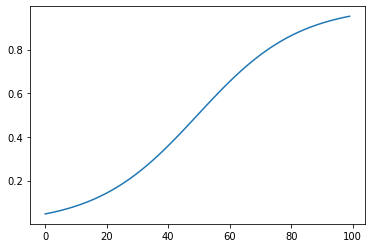

In [88]:
x=np.linspace(-3,3,num=100)
plt.plot(sigmoid(x))

In [91]:
# Build a toy dataset.
inputs = np.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
targets = np.array([True, True, False, True])

# Check the gradients numerically, just to be safe.
weights = np.array([0.0, 0.0, 0.0])

In [92]:
y_hat=net(weights,inputs)

In [107]:
grads=training_gradient_fun(weights)

In [108]:
training_loss(weights)

1.9724735775892923

In [109]:
grads

array([-0.57290258,  0.5519025 , -1.30807308])

In [110]:
weights-=grads*0.1

In [111]:
training_loss(weights)

1.7547154210000155

In [106]:
weights

array([ 0.14777058, -0.20795657,  0.33188054])

None
Iteration : 0, Trained loss: 2.283497754191519
Iteration : 100, Trained loss: 0.16583313868587368
Iteration : 200, Trained loss: 0.0849810893765908
Iteration : 300, Trained loss: 0.05693670361850768
Iteration : 400, Trained loss: 0.04275843168296321
Iteration : 500, Trained loss: 0.034214708136425354
Iteration : 600, Trained loss: 0.028508088444567543
Iteration : 700, Trained loss: 0.024428500857397714
Iteration : 800, Trained loss: 0.021367810994468505
Iteration : 900, Trained loss: 0.01898713850700256


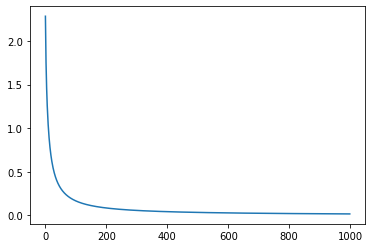

In [112]:
# Build a toy dataset.
inputs = np.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
targets = np.array([True, True, False, True])

# Check the gradients numerically, just to be safe.
weights = np.array([0.0, 0.0, 0.0])
print(check_grads(training_loss, modes=['rev'])(weights))
w_hat,loss=train_net(weights,1000)
plt.plot(loss)
plt.show()

In [117]:
y_hat=net(weights,inputs)

In [118]:
y_hat>0.5

array([ True,  True, False,  True])

In [119]:
targets

array([ True,  True, False,  True])

None
Iteration : 0, Trained loss: 2.749205428823657
Iteration : 100, Trained loss: 2.6560057996788666
Iteration : 200, Trained loss: 2.6556672808685096
Iteration : 300, Trained loss: 2.655665618068137
Iteration : 400, Trained loss: 2.6556656097306766
Iteration : 500, Trained loss: 2.6556656096888105
Iteration : 600, Trained loss: 2.6556656096886
Iteration : 700, Trained loss: 2.6556656096885995
Iteration : 800, Trained loss: 2.655665609688599
Iteration : 900, Trained loss: 2.655665609688599
[-0.43716075  0.390301  ]


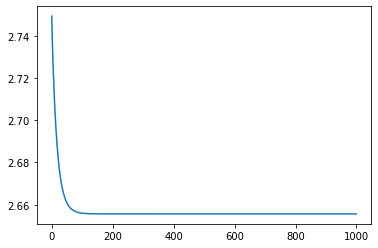

In [130]:
inputs = np.array([[1, 1],
                   [4,2],
                   [4,5],
                   [5,5]])
targets = np.array([True, False, False, True])

# Check the gradients numerically, just to be safe.
weights = np.array([0.0, 0.0])
print(check_grads(training_loss, modes=['rev'])(weights))
w_hat,loss=train_net(weights,1000,eta=0.05)
print(w_hat)
plt.plot(loss)
plt.show()


Text(0.5, 1.0, 'Estimador de Maxima Verosimilitud $\\hat w=[-0.44,0.39]$')

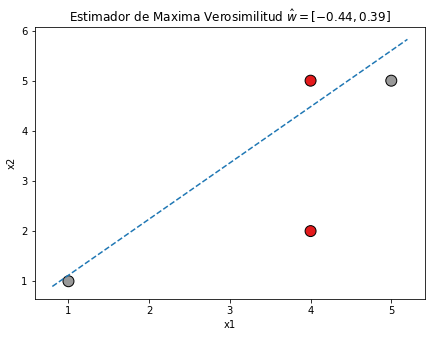

In [131]:
import matplotlib.pyplot as plt


plt.figure(figsize=(7,5))
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets, cmap=plt.cm.Set1,edgecolor='k',s=120)
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

def line(x0):
    return (-(x0 * w_hat[0]) ) / w_hat[1]

plt.plot([xmin, xmax], [line(xmin), line(xmax)],ls="--")
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(r'Estimador de Maxima Verosimilitud $\hat w=[{0:0.2f},{1:0.2f}]$'.format(w_hat[0],w_hat[1]))
#plt.savefig('prueba_clasificador.png')
#plt.close()

# Redes Neuronales Profundas

Una alternativa para superar el problema de la separacion lineal entre clases es utilizar multiples perceptrones ordenados en capas

La salida toma la siguiente forma:
\begin{align*}
f(\mathbf x) = \phi_0 \left(w_0+\sum_h w_{hk}\phi_h (\alpha_h+\sum_i w_{ih}x_i) \right)
\end{align*}

In [262]:
def sigmoid(x):
    return np.exp(x)/(1+np.exp(x))
    
def init_bnn_params(layer_widths):
    weights = {}
    for i, (n_in, n_out) in enumerate(zip(layer_widths[:-1], layer_widths[1:])):
        weights.update({f"w_{i}":np.random.normal(0,.1,size=(n_in, n_out))})
    return weights

def net(weights, inputs, n_hidden_layers):
    z = inputs
    for i in range(n_hidden_layers + 1):
        z = z @ weights[f"w_{i}"]
        z = np.tanh(z) if i != n_hidden_layers else z
    z = z.squeeze(-1)
    return sigmoid(z)

def training_loss(weights):
    # Training loss is the negative log-likelihood of the training labels.
    preds = net(weights, inputs,n_hidden_layers)
    label_probabilities = np.log(preds) * targets + np.log((1 - preds)) * (1 - targets)
    return -np.sum(label_probabilities)

def train_net(weights,iterations,eta=0.1):
    loss_history=[]
    for i in range(iterations):
      grads=training_gradient_fun(weights)
      for var in weights.keys():
        weights[var] -=  grads[var]* eta
      loss_history.append(training_loss(weights))
      if i%(iterations/10)==0:
        print("Iteration : {0}, Trained loss: {1}".format(i,training_loss(weights)))
    return weights,loss_history

training_gradient_fun = grad(training_loss)

In [268]:
inputs = np.array([[1, 1],
                   [4,2],
                   [4,5],
                   [5,5]])
targets = np.array([True, False, False, True])

layer_widths=[inputs.shape[1],5,1]
weights=init_bnn_params(layer_widths)
n_hidden_layers=len(layer_widths) - 2

In [269]:
training_loss(weights)

2.7691254256265374

In [270]:
weights,loss=train_net(weights,10000,eta=0.01)

Iteration : 0, Trained loss: 2.7688125196769433
Iteration : 1000, Trained loss: 2.6519578968379784
Iteration : 2000, Trained loss: 1.8925044450139707
Iteration : 3000, Trained loss: 0.9140011748247299
Iteration : 4000, Trained loss: 0.23724165151590038
Iteration : 5000, Trained loss: 0.12644703943854707
Iteration : 6000, Trained loss: 0.08473909348194839
Iteration : 7000, Trained loss: 0.06323603786269574
Iteration : 8000, Trained loss: 0.05023068948642155
Iteration : 9000, Trained loss: 0.04156026806370294


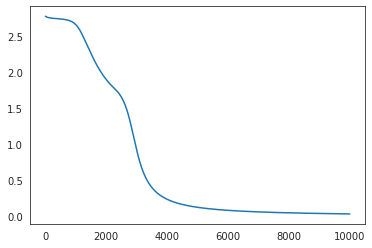

In [271]:
plt.plot(loss)

In [272]:
h = .02  # step size in the mesh
x_min, x_max = inputs[:, 0].min() , inputs[:, 0].max()
y_min, y_max = inputs[:, 1].min() , inputs[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
X_grid=np.vstack([xx.ravel(),yy.ravel()]).T

#plt.savefig('prueba_clasificador.png')
#plt.close()

(1.0, 5.0)

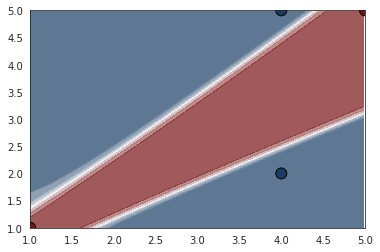

In [273]:
import seaborn as sns

sns.set_style("white")

cmap = sns.diverging_palette(250, 12, s=85, l=25, as_cmap=True)

Z_pred=net(weights, X_grid, n_hidden_layers)
plt.contourf(xx, yy, Z_pred.reshape(xx.shape), cmap=cmap,alpha=.8)
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets, cmap=cmap,edgecolor='k',s=120)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)